In [1]:

%tensorflow_version 2.x

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random
from keras.utils.np_utils import to_categorical

TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
img_rows,img_cols=28,28
batch_size=128
num_classes=10
epochs=20
dropout=.5

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
orig_test=x_test

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Text(0.5, 1.0, 'label 5')

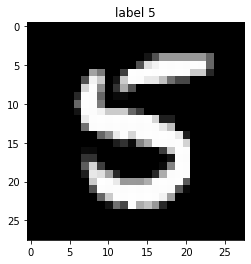

In [5]:
index=random.randrange(1000)
plt.imshow(orig_test[index],cmap='gray')
plt.title('label %d'%y_test[index])

In [6]:
if K.image_data_format()=='channels_first':
  x_train=x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
  x_test=x_train.reshape(x_test.shape[0],1,img_rows,img_cols)
  input_shape=(1,img_rows,img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  

x_train,x_test=x_train/255,x_test/255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')



60000 train samples
10000 test samples


In [7]:
orig_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_test[1]

2

In [9]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [10]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2304 - accuracy: 0.9299 - val_loss: 0.0491 - val_accuracy: 0.9830
Epoch 2/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0799 - accuracy: 0.9758 - val_loss: 0.0365 - val_accuracy: 0.9877
Epoch 3/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 4/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 5/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0409 - accuracy: 0.9868 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 6/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0289 - val_accuracy: 0.9916
Epoch 7/20
60000/60000 [==============================

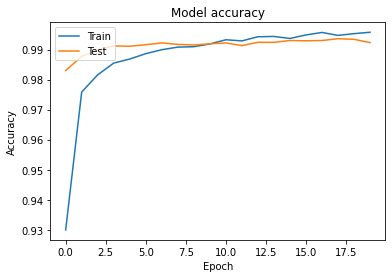

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss',score[0])
print('test accuracy',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')



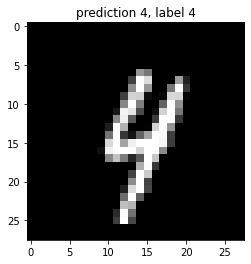

In [21]:
predictions=model.predict(x_test)
most_likely=predictions.argmax(1)

index=random.randrange(1000)
plt.title('prediction %d, label %d'% (most_likely[index] ,  y_test[index]))
plt.imshow(orig_test[index] ,cmap='gray')


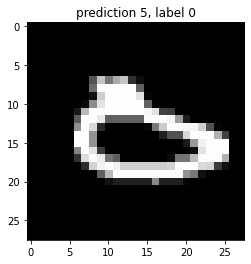

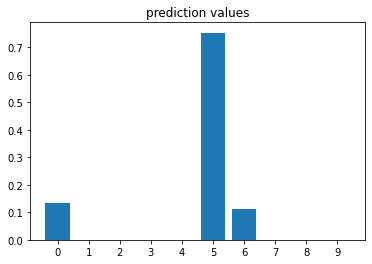

In [25]:
for i in range(1000):
  index=random.randrange(1000)
  if most_likely[index]!=y_test[index]:
    break
plt.imshow(orig_test[index] ,cmap='gray')
plt.title('prediction %d, label %d'% (most_likely[index] ,  y_test[index]))
plt.show()

plt.bar(range(10),predictions[index],tick_label=range(10))
plt.title('prediction values')
plt.show()